In [1]:
import os

# standard libraries
import numpy as np
import matplotlib.pyplot as plt


# custom library
from devenw.plot import plot_dimred, plot_acts, plot_corr, plot_eigenspec

# going to root of devenw
os.chdir('..')

# reload code if library changes
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
# defining analysis parameters
ds = ['ani99_XXXX-XX-XX_a', 'ani98_XXXX-XX-XX_a',]

In [3]:
all_tiff_dimred_imp = []
for i in range(len(ds)):
    tiff_dimred_imp = np.load(f'data/{ds[i]}/patch_sz/export_tiff_dimred.npy', allow_pickle=True).tolist()
    all_tiff_dimred_imp.append(tiff_dimred_imp)

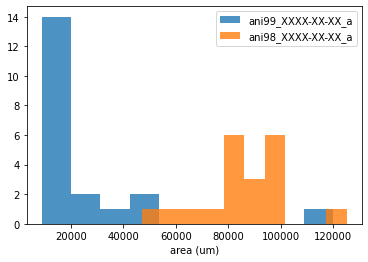

In [4]:
# comparing distributions of patch areas between datasets
n_bins = 10

for (i, tiff_dimred_imp) in enumerate(all_tiff_dimred_imp):
    data = tiff_dimred_imp['roi_areas']
    plt.hist(data, n_bins, label = ds[i], alpha=0.8)
    plt.xlabel('area (um)')
plt.legend()
plt.show()

20


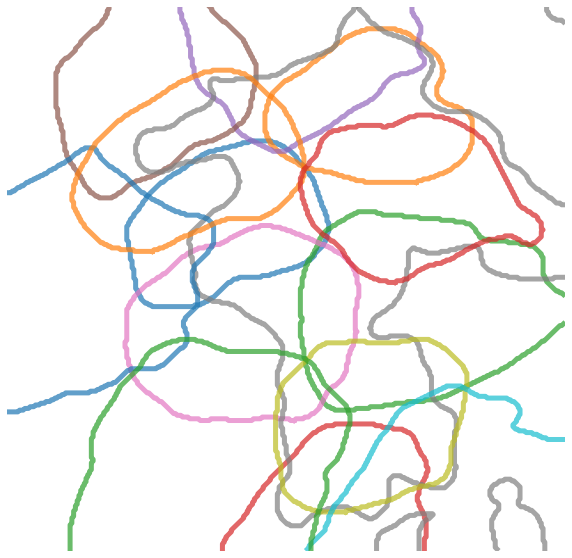

In [5]:
# plotting contours for one dataset between two min and max components
comp_min = 1
comp_max = 15

i = 0 # emx ('ani99_XXXX-XX-XX_a')

emx_conts = all_tiff_dimred_imp[i]['conts']
print(len(emx_conts))

plt.figure(figsize=(10,10))
for (i, emx_cont) in enumerate(emx_conts[comp_min:comp_max]):
    
    c = f'C{i}'
    
    for (j, emx_cont_subcont) in enumerate(emx_cont):
        
        plt.plot(emx_cont_subcont[:,1], emx_cont_subcont[:,0], linewidth=5, alpha=0.7, c=c)

        plt.ylim((315, 0))
        plt.xlim((0,315))
        plt.axis('off')
        

# TODO (Sofia):

1) Run tiff_dimred for everything
2) add names of datasets to this script to load the data from tiff_dimred
3) maybe group the 'areas' variables based on age or genotype (to pool data), then make the same plot as in cell [4] but for pooled data
4) frequency of activations challenge (use loading_times to get frequency of activation of each patch)